In [25]:
import pandas as pd
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns # data visualization
from sklearn.cluster import KMeans
%matplotlib inline

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/wine/wine.data',
header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', \
                   'OD280/OD315 of diluted wines', 'Proline']

In [9]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
df["Class label"].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

## K-Means Cluster with randomly initialized central

In [23]:
x = df.iloc[:,1:]

In [31]:
kmeans = KMeans(n_clusters=3, init='random',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_

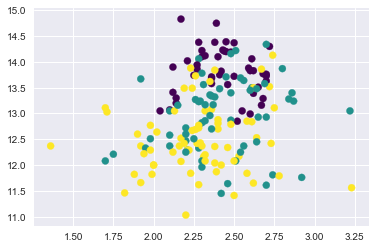

In [30]:
plt.scatter(df.iloc[:, 3], df.iloc[:, 1], c= kmeans.labels_, s=50, cmap='viridis')

## Elbow method to find optimal K for k-means++

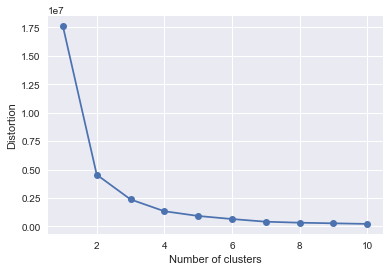

In [35]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### The elbow is near 3 and 4. Let's test it with sihousette plot

## silhouette plot to test K = 3

In [40]:
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples

In [48]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

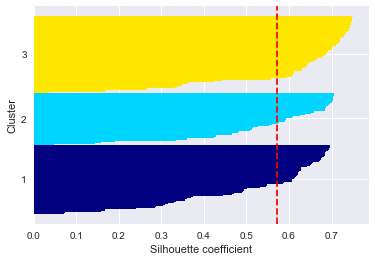

In [49]:
silhouette_vals = silhouette_samples(x, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#### A good cluster. All with similar length and width

## silhouette plot to test K = 4

In [55]:
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

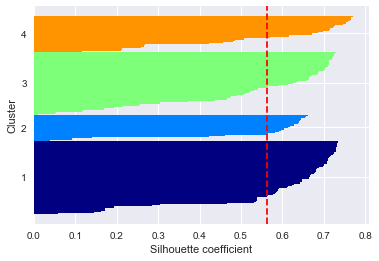

In [56]:
silhouette_vals = silhouette_samples(x, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

#### A bad cluster. With different length and width